In [1]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [5]:
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis=1)

In [10]:
qual = ['Survived', 'Pclass','Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age' , 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null category
Pclass      891 non-null category
Name        891 non-null category
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null category
Fare        891 non-null float64
Embarked    889 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 107.6 KB
None


In [15]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic.describe(include=['category'])

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"van Melkebeke, Mr. Philemon",male,CA. 2343,S
freq,549,491,1,577,7,644


In [23]:
freq = pd.DataFrame(titanic['Survived'].value_counts(normalize=True))

In [29]:
freq.rename(columns={'Survived':'도수'})


,도수
0,0.616162
1,0.383838


In [38]:
from scipy.stats import spearmanr, kendalltau
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print(round(corr, 3), round(p, 3))
print(round(corr2, 3), round(p2, 3))

-0.34 0.0
-0.324 0.0


In [58]:
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts().reset_index())
freq1 = freq1.rename(columns={'index':'계급','Age':'도수'}).sort_values(by='계급')
freq1['상대도수'] = freq1['도수'].apply(lambda x : x/ freq1['도수'].sum())
freq1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


In [57]:
result2 = pd.cut(titanic['Age'], bins=[0,20,40,60,float('inf')], right=False)
freq2 = pd.DataFrame(result1.value_counts().reset_index())
freq2 = freq2.rename(columns={'index':'계급','Age':'도수'}).sort_values(by='계급')
freq2['상대도수'] = freq2['도수'].apply(lambda x : x/ freq2['도수'].sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


In [63]:
iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
iqr

23.0896

In [70]:
titanic['Fare'].var(ddof=0), titanic['Fare'].var(ddof=1)

(2466.665311685043, 2469.436845743116)

In [71]:
titanic['Fare'].std(ddof=0), titanic['Fare'].std(ddof=1)

(49.6655344447741, 49.6934285971809)

matplotlib.axes._subplots.AxesSubplot

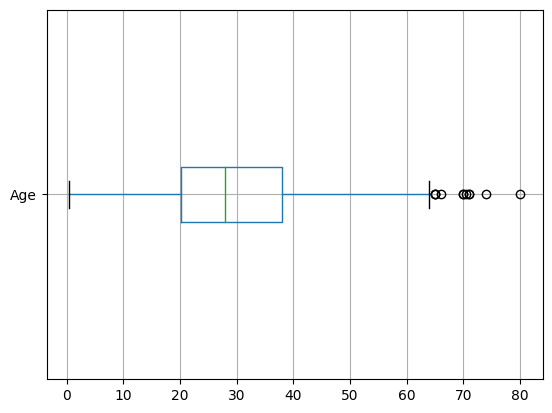

In [90]:
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})

# 연습문제

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')

In [108]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,no


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
month        4521 non-null object
y            4521 non-null object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [110]:
quan = ['age','balance']
qual = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "y"]


In [113]:
for col in qual:
    df[col] = df[col].astype('category')

In [115]:
df.describe()

,age,balance
count,4521.000000,4521.000000
mean,41.170095,1422.657819
std,10.576211,3009.638142
min,19.000000,-3313.000000
25%,33.000000,69.000000
50%,39.000000,444.000000
75%,49.000000,1480.000000
max,87.000000,71188.000000


In [117]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,month,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,12,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,may,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,1398,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,NaN,NaN


In [118]:
df.describe(include=['category'])

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


In [131]:
spearmanr(df['age'],df['balance'])

SpearmanrResult(correlation=0.07599765944011418, pvalue=3.121720062882219e-07)

<AxesSubplot:xlabel='age', ylabel='balance'>

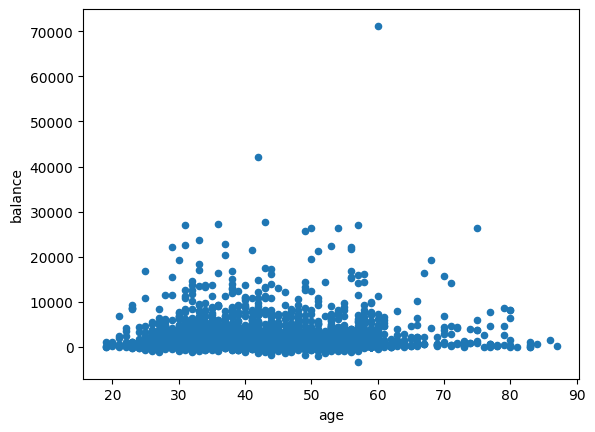

In [128]:
df.plot(kind='scatter',x='age',y='balance')

In [139]:
df2 = pd.DataFrame({'year':[2018,2019,2020,2021,2022], 'rate':[4,3,5,10,8]})
df2.mean()

year    2020.0
rate       6.0
dtype: float64

In [ ]:
x / t1 = 5km/h
x / t2 = 7km/h

2x / t1+t2 

5t1 = 7t2

2x / x/5 + x/7

2 / 1/5+1/7 = 2/ (12/35)
70/12

In [140]:
70/12

5.833333333333333